In [1]:
# =======================
# Standard Libraries
# =======================
import ast
import re
from collections import Counter
import warnings

# =======================
# Data Handling
# =======================
import pandas as pd
import numpy as np

# =======================
# Visualization
# =======================
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# =======================
# Scikit-learn
# =======================
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.svm import SVR
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import SelectKBest, f_regression, RFE
from sklearn.metrics import mean_squared_error, r2_score, classification_report, confusion_matrix

# =======================
# XGBoost
# =======================
import xgboost as xgb

# =======================
# Settings
# =======================
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)

plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("Advanced libraries imported successfully!")


Advanced libraries imported successfully!


In [2]:
# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
warnings.filterwarnings('ignore')

# Set style for plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

### 1. Understanding Data 

#### 1.1 Loading Dataset and Visualizing the data 


In [3]:
# loading dataset 
# df = pd.read_csv(r'D:\DATA SCIENCE AND ML\job_trend_predictor\airflow_automation\etl_pipeline\data\raw\jobs.csv')
df = pd.read_csv(r'D:\DATA SCIENCE AND ML\job_trend_predictor\airflow_automation\etl_pipeline\data\raw\scraped_data.csv')
print("Dataframe shape:", df.shape)
print(f"Columns: {df.columns.tolist()}")
df.head()

Dataframe shape: (1724, 16)
Columns: ['Job Type', 'Title', 'Company', 'Experience', 'Salary', 'Location', 'Education', 'Skills', 'Role', 'Industry Type', 'Department', 'Employment Type', 'Role Category', 'Description', 'Job URL', 'Timestamp']


,Job Type,Title,Company,Experience,Salary,Location,Education,Skills,Role,Industry Type,Department,Employment Type,Role Category,Description,Job URL,Timestamp
0,Data Scientist,Data Scientist,Blue Star,0 - 2 years,Not Disclosed,Thane,EducationUG:Any GraduatePG:Any Postgraduate,"[[], ['algorithms', 'python', 'modeling', 'dat...","Data Scientist ,","Industrial Equipment / Machinery ,","Data Science & Analytics ,","Full Time, Permanent",Data Science & Machine Learning,Blue Star Ltd is looking for Data Scientist to...,https://www.naukri.com/job-listings-data-scien...,2025-09-17 05:44:17
1,Data Scientist,Data Scientist,Capgemini,4 - 7 years,Not Disclosed,Bengaluru,EducationUG:Any GraduatePG:Any Postgraduate,"[['python', 'machine learning', 'tensorflow', ...","Data Scientist ,","IT Services & Consulting ,","Data Science & Analytics ,","Full Time, Permanent",Data Science & Machine Learning,"Your Role Gen AI ,Computer vision, Cloud exp ,...",https://www.naukri.com/job-listings-data-scien...,2025-09-17 05:44:22
2,Data Scientist,Data Scientist,Cognizant,8 - 10 years,Not Disclosed,Chennai,EducationPG:LLM in Any Specialization,"[[], ['kubernetes', 'algorithms', 'python', 'd...","Full Stack Data Scientist ,","IT Services & Consulting ,","Data Science & Analytics ,","Full Time, Permanent",Data Science & Machine Learning,Role –Gen AI Engineer (Senior / Manager) Job L...,https://www.naukri.com/job-listings-data-scien...,2025-09-17 05:44:28
3,Data Scientist,Data Scientist,Kotak Life Insurance,5 - 10 years,Not Disclosed,Bengaluru,EducationUG:Any GraduatePG:Any Postgraduate,"[['software development', 'presentation skills...","Full Stack Data Scientist ,","IT Services & Consulting ,","Data Science & Analytics ,","Full Time, Permanent",Data Science & Machine Learning,About The Role What we offer Our mission is si...,https://www.naukri.com/job-listings-data-scien...,2025-09-17 05:44:35
4,Data Scientist,Data Scientist - Artificial Intelligence,IBM,3 - 6 years,Not Disclosed,Bengaluru,EducationUG:B.Tech/B.E. in Any SpecializationP...,"[['Artificial Intelligence'], ['Data Science',...","Data Scientist ,","IT Services & Consulting ,","Data Science & Analytics ,","Full Time, Permanent",Data Science & Machine Learning,"As an Associate Data Scientist at IBM, you wil...",https://www.naukri.com/job-listings-data-scien...,2025-09-17 05:44:41


#### 1.2 Understanding Columns of dataset and their datatypes

In [4]:

print(f"Shalpe of Dataset: {df.shape}")
print(f"\nData Types :")
print(df.dtypes)

# finding number of features and their types
num_features = df.select_dtypes(include=[np.number]).columns.tolist()
cat_features = df.select_dtypes(include=['object']).columns.tolist()

print(f"\nNumerical Features ({len(num_features)}): {num_features}")
print(f"\nCategorical Features ({len(cat_features)}): {cat_features}")

Shalpe of Dataset: (1724, 16)

Data Types :
Job Type           object
Title              object
Company            object
Experience         object
Salary             object
Location           object
Education          object
Skills             object
Role               object
Industry Type      object
Department         object
Employment Type    object
Role Category      object
Description        object
Job URL            object
Timestamp          object
dtype: object

Numerical Features (0): []

Categorical Features (16): ['Job Type', 'Title', 'Company', 'Experience', 'Salary', 'Location', 'Education', 'Skills', 'Role', 'Industry Type', 'Department', 'Employment Type', 'Role Category', 'Description', 'Job URL', 'Timestamp']


#### Observation :
   1. There are Zero numerical features.
   2. All features have `object` datatype.

#### 1.3 Finding NULL and Duplicated values

In [5]:
print("\nMissing values : ")
print(df.isnull().sum())
print(f"\nDuplicated row : {df.duplicated().sum()}")


Missing values : 
Job Type           0
Title              1
Company            2
Experience         1
Salary             1
Location           1
Education          0
Skills             0
Role               1
Industry Type      1
Department         1
Employment Type    1
Role Category      1
Description        1
Job URL            0
Timestamp          0
dtype: int64

Duplicated row : 0


#### Observation : 
1. The data do not contain any duplicated value
2. Few features contain few null value betwee count of 1 to 5 
   
#### Conclusion : 
Since only categorical feature contain null value in very small amount so these null value can be __replace by 'None' string literal__

In [6]:
# replaceing missing values by "Unknown"
categorical_cols_having_null = ["Title","Company","Location","Role","Industry Type","Department","Employment Type","Role Category","Description"]

for col in categorical_cols_having_null:
    df[col].fillna("Unknown", inplace=True)
    
print("\nMissing values after imputation: ")
print(df.isnull().sum())


Missing values after imputation: 
Job Type           0
Title              0
Company            0
Experience         1
Salary             1
Location           0
Education          0
Skills             0
Role               0
Industry Type      0
Department         0
Employment Type    0
Role Category      0
Description        0
Job URL            0
Timestamp          0
dtype: int64


### 2. Data Cleaning

#### 2.1 Cleaning and standardize categorical columns

In [7]:
# Clean and standardize categorical columns
def clean_text(text):
    if pd.isna(text):
        return 'Unknown'
    return str(text).strip()

# Clean categorical columns
categorical_cols = df.columns[df.dtypes == 'object'].tolist()

for col in categorical_cols:
    df[col] = df[col].apply(clean_text)

#### 2.2 Analyzing and cleaning `Salary` , `Experience`, `Skill` salary.

In [8]:
print("Sample of Salary column : ", df["Salary"].sample(5).tolist())
print("\nUnique values in Salary column : ", df["Salary"].unique())


Sample of Salary column :  ['Not Disclosed', 'Not Disclosed', 'Not Disclosed', 'Not Disclosed', '3.5-5.5 Lacs P.A.']

Unique values in Salary column :  ['Not Disclosed' '9-19 Lacs P.A.' '7-16 Lacs P.A.' '15-25 Lacs P.A.'
 '5-7 Lacs P.A.' '8.5-17 Lacs P.A.' '3-8 Lacs P.A.' '2.5-3 Lacs P.A.'
 '12-20 Lacs P.A.' '3-6 Lacs P.A.' '2.5-3.75 Lacs P.A.' '5-14 Lacs P.A.'
 '5-10 Lacs P.A.' '10-12 Lacs P.A.' '5-6 Lacs P.A.' '3.5-5.5 Lacs P.A.'
 '13-23 Lacs P.A.' '18-20 Lacs P.A.' '11-21 Lacs P.A.' '6-7.5 Lacs P.A.'
 '1.08-1.8 Lacs P.A.' '6-8 Lacs P.A.' '3-4.25 Lacs P.A.' '8-16 Lacs P.A.'
 '3-4 Lacs P.A.' '1-2.5 Lacs P.A.' '3.6-3.84 Lacs P.A.' '1-3.5 Lacs P.A.'
 'Unpaid' '2.25-4 Lacs P.A.' '60,000-1.25 Lacs P.A.' '1.5-6.5 Lacs P.A.'
 '3-7.2 Lacs P.A.' '2-5 Lacs P.A.' '10-20 Lacs P.A.' '27.5-32.5 Lacs P.A.'
 '20-32.5 Lacs P.A.' '8-18 Lacs P.A.' '3-5 Lacs P.A.' '15-22 Lacs P.A.'
 '80,000-1.25 Lacs P.A.' '14-24 Lacs P.A.' '20-35 Lacs P.A.'
 '11-15 Lacs P.A.' '5-8.5 Lacs P.A.' '8-13 Lacs P.A.' '7.5-15 

#### Observation :
Salary column contain salary data in range format e.g (7-8 LPA) with encoded into object dtype

#### Conclusion : We will extract average salary and add as a new feature in dataset

In [9]:
print("\nSample of Experience column : ", df["Experience"].sample(5).tolist())
print("Unique values in Experience column : ", df["Experience"].unique())




Sample of Experience column :  ['2 - 7 years', '6 - 9 years', '0 years', '4 - 9 years', '5 - 7 years']
Unique values in Experience column :  ['0 - 2 years' '4 - 7 years' '8 - 10 years' '5 - 10 years' '3 - 6 years'
 '9 - 14 years' '3 - 8 years' '3 - 5 years' '4 - 9 years' '2 - 7 years'
 '1 - 6 years' '8 - 13 years' '1 - 4 years' '3 - 7 years' '6 - 10 years'
 '2 - 5 years' '6 - 8 years' '5 - 8 years' '10 - 16 years' '0 - 5 years'
 '0 - 1 years' '6 - 11 years' '7 - 12 years' '0 - 4 years' '1 - 5 years'
 '0 - 3 years' '1 - 3 years' '4 - 6 years' '6 - 9 years' '2 - 3 years'
 '2 - 6 years' '15 - 20 years' '0 - 13 years' '0 - 8 years' '7 - 8 years'
 '12 - 15 years' '10 - 15 years' '15 - 25 years' '5 - 7 years'
 '0 - 6 years' '2 - 4 years' 'No fixed duration' '1 - 2 years'
 '1 - 7 years' '10 - 13 years' '4 - 8 years' '9 - 12 years' '5 - 9 years'
 '10 - 20 years' '7 - 11 years' '9 - 13 years' '6 - 15 years' '13 years'
 '1 - 10 years' '12 - 14 years' '8 - 11 years' '4 - 5 years'
 '7 - 10 years'

#### Observation :
Experience column contain salary data in range format e.g (5 - 10 years) with encoded into object dtype

#### Conclusion : We will extract average experience and add as a new feature in dataset

In [10]:
print("\nSample of Skills column : ", df["Skills"].sample(5).tolist())
print("\nUnique values in Skills column : ", df["Skills"].unique())


Sample of Skills column :  ["[[], ['gsm', 'css', 'hsdpa', 'android', 'bug fixing', 'mobile application development', 'requirement gathering', 'java', '3g', 'wcdma', 'html', 'gprs', 'api', 'cdma', 'conceptualization', 'lte', 'umts', 'software development', 'ux', 'software testing', 'photoshop', 'javascript', '4g', 'android application development', '2g']]", "[['image processing', 'python', 'numpy', 'machine learning', 'opencv'], ['natural language processing', 'microsoft azure', 'jupyter notebook', 'cloud platforms', 'object detection', 'sql', 'pandas', 'deep learning', 'tensorflow', 'java', 'data science', 'gcp', 'matplotlib', 'computer vision', 'pytorch', 'aws']]", "[['performance tuning', 'database administration', 'database design', 'oracle dba', 'design principles'], ['database maintenance', 'database management system', 'oracle', 'recovery', 'javascript', 'sql server', 'sql', 'spring', 'java', 'oracle database', 'design patterns', 'log shipping', 'mysql']]", "[['continuous integr

#### Observation :
Skills contain salary data in string contain multiple list eg. ("['python','Pandas'], ['Power Bi']") .

#### Conclusion : We will extract flatten list of skills with uniques values

In [11]:
def extract_salary(salary_str):
    if pd.isna(salary_str) or salary_str == "Not disclosed":
        return np.nan

    numbers = re.findall(r'\d+', str(salary_str))
    if not numbers:
        return np.nan
    
    numbers = [int(x) for x in numbers]
    return sum(numbers)/len(numbers)


def extract_experience_years(exp_str):
    if pd.isna(exp_str):
        return np.nan
    
    numbers = re.findall(r'\d+', str(exp_str))
    if not numbers:
        return np.nan
    
    numbers = [int(x) for x in numbers]
    return sum(numbers)/len(numbers)
    

def process_skills(skills_str):
    if pd.isna(skills_str):
        return []
    
    try:
        skill_list = ast.literal_eval(skills_str)
        
        all_skills = []
        for skill_group in skill_list:
            if isinstance(skill_group, list):
                all_skills.extend(skill_group)
            
        cleaned_list = []
        for skill in all_skills:
            if isinstance(skill, str):
                cleaned_skill = skill.strip().lower()
                if cleaned_skill and len(cleaned_skill) > 1:
                    cleaned_list.append(cleaned_skill)

        return cleaned_list
    except (ValueError, SyntaxError):
        return []

In [12]:
# Apply salary extraction
df['salary_numeric'] = df['Salary'].apply(extract_salary)

# Apply experience extraction
df['experience_years'] = df['Experience'].apply(extract_experience_years)

print("Salary and Experience processing completed.")
print(f"Salary range: {df['salary_numeric'].min():.2f} - {df['salary_numeric'].max():.2f} LPA")
print(f"Experience range: {df['experience_years'].min():.2f} - {df['experience_years'].max():.2f} years")


# Apply skills processing
df['skills_processed'] = df['Skills'].apply(process_skills)
df['skills_count'] = df['skills_processed'].apply(len)

print(f"\nSkills processing completed.")
print(f"Average skills per job: {df['skills_count'].mean():.2f}")
print(f"Max skills in a job: {df['skills_count'].max()}")


Salary and Experience processing completed.
Salary range: 0.00 - 57.50 LPA
Experience range: 0.00 - 20.00 years

Skills processing completed.
Average skills per job: 11.82
Max skills in a job: 37


In [13]:
df.head()

,Job Type,Title,Company,Experience,Salary,Location,Education,Skills,Role,Industry Type,Department,Employment Type,Role Category,Description,Job URL,Timestamp,salary_numeric,experience_years,skills_processed,skills_count
0,Data Scientist,Data Scientist,Blue Star,0 - 2 years,Not Disclosed,Thane,EducationUG:Any GraduatePG:Any Postgraduate,"[[], ['algorithms', 'python', 'modeling', 'dat...","Data Scientist ,","Industrial Equipment / Machinery ,","Data Science & Analytics ,","Full Time, Permanent",Data Science & Machine Learning,Blue Star Ltd is looking for Data Scientist to...,https://www.naukri.com/job-listings-data-scien...,2025-09-17 05:44:17,NaN,1.0,"[algorithms, python, modeling, data analysis, ...",17
1,Data Scientist,Data Scientist,Capgemini,4 - 7 years,Not Disclosed,Bengaluru,EducationUG:Any GraduatePG:Any Postgraduate,"[['python', 'machine learning', 'tensorflow', ...","Data Scientist ,","IT Services & Consulting ,","Data Science & Analytics ,","Full Time, Permanent",Data Science & Machine Learning,"Your Role Gen AI ,Computer vision, Cloud exp ,...",https://www.naukri.com/job-listings-data-scien...,2025-09-17 05:44:22,NaN,5.5,"[python, machine learning, tensorflow, pytorch...",21
2,Data Scientist,Data Scientist,Cognizant,8 - 10 years,Not Disclosed,Chennai,EducationPG:LLM in Any Specialization,"[[], ['kubernetes', 'algorithms', 'python', 'd...","Full Stack Data Scientist ,","IT Services & Consulting ,","Data Science & Analytics ,","Full Time, Permanent",Data Science & Machine Learning,Role –Gen AI Engineer (Senior / Manager) Job L...,https://www.naukri.com/job-listings-data-scien...,2025-09-17 05:44:28,NaN,9.0,"[kubernetes, algorithms, python, data manageme...",21
3,Data Scientist,Data Scientist,Kotak Life Insurance,5 - 10 years,Not Disclosed,Bengaluru,EducationUG:Any GraduatePG:Any Postgraduate,"[['software development', 'presentation skills...","Full Stack Data Scientist ,","IT Services & Consulting ,","Data Science & Analytics ,","Full Time, Permanent",Data Science & Machine Learning,About The Role What we offer Our mission is si...,https://www.naukri.com/job-listings-data-scien...,2025-09-17 05:44:35,NaN,7.5,"[software development, presentation skills, da...",23
4,Data Scientist,Data Scientist - Artificial Intelligence,IBM,3 - 6 years,Not Disclosed,Bengaluru,EducationUG:B.Tech/B.E. in Any SpecializationP...,"[['Artificial Intelligence'], ['Data Science',...","Data Scientist ,","IT Services & Consulting ,","Data Science & Analytics ,","Full Time, Permanent",Data Science & Machine Learning,"As an Associate Data Scientist at IBM, you wil...",https://www.naukri.com/job-listings-data-scien...,2025-09-17 05:44:41,NaN,4.5,"[artificial intelligence, data science, matplo...",9


#### 2.3 Creating new features out of existing 

In [14]:
# create additinal features for analysis
# Location tier (tier 1, tier 2, tier 3)
tier1_cities = ['mumbai', 'delhi', 'bangalore', 'bengaluru', 'hyderabad', 'pune', 'chennai', 'kolkata']
tier2_cities = ['ahmedabad', 'jaipur', 'surat', 'lucknow', 'kanpur', 'nagpur', 'indore', 'thane']

def get_city_tier(location):
    location = location.lower()
    
    if location in tier1_cities:
        return 'Tier 1'
    
    if location in tier2_cities:
        return 'Tier 2'
    return 'Tier 3'

# experience level categorization(entry, mid, senior)

def categorize_experience(years):
    if pd.isna(years):
        return 'Unknown'
    
    if years < 2:
        return 'Entry Level'
    elif 2 <= years < 5:
        return 'Mid Level'
    elif 5 <= years < 10:
        return 'Senior Level'
    else:
        return 'Expert Level'

In [15]:
new_df = df.copy()
new_df = df[['salary_numeric',	'experience_years',	'skills_processed',	'skills_count','Industry Type', 'Education', 'Company' , 'Location','Job Type']]

new_df = new_df.dropna(subset=['salary_numeric']).copy()



In [16]:
new_df["experience_level"] = df["experience_years"].apply(categorize_experience)
new_df["city_tier"] = df["Location"].apply(get_city_tier)

print("Additional features created:")
print(f"City tiers: {new_df['city_tier'].value_counts().to_dict()}")
print(f"Experience levels: {new_df['experience_level'].value_counts().to_dict()}")

Additional features created:
City tiers: {'Tier 3': 179, 'Tier 1': 73, 'Tier 2': 16}
Experience levels: {'Senior Level': 105, 'Mid Level': 85, 'Entry Level': 47, 'Expert Level': 30, 'Unknown': 1}


### 3. Exploratory Data Analysis (EDA) 

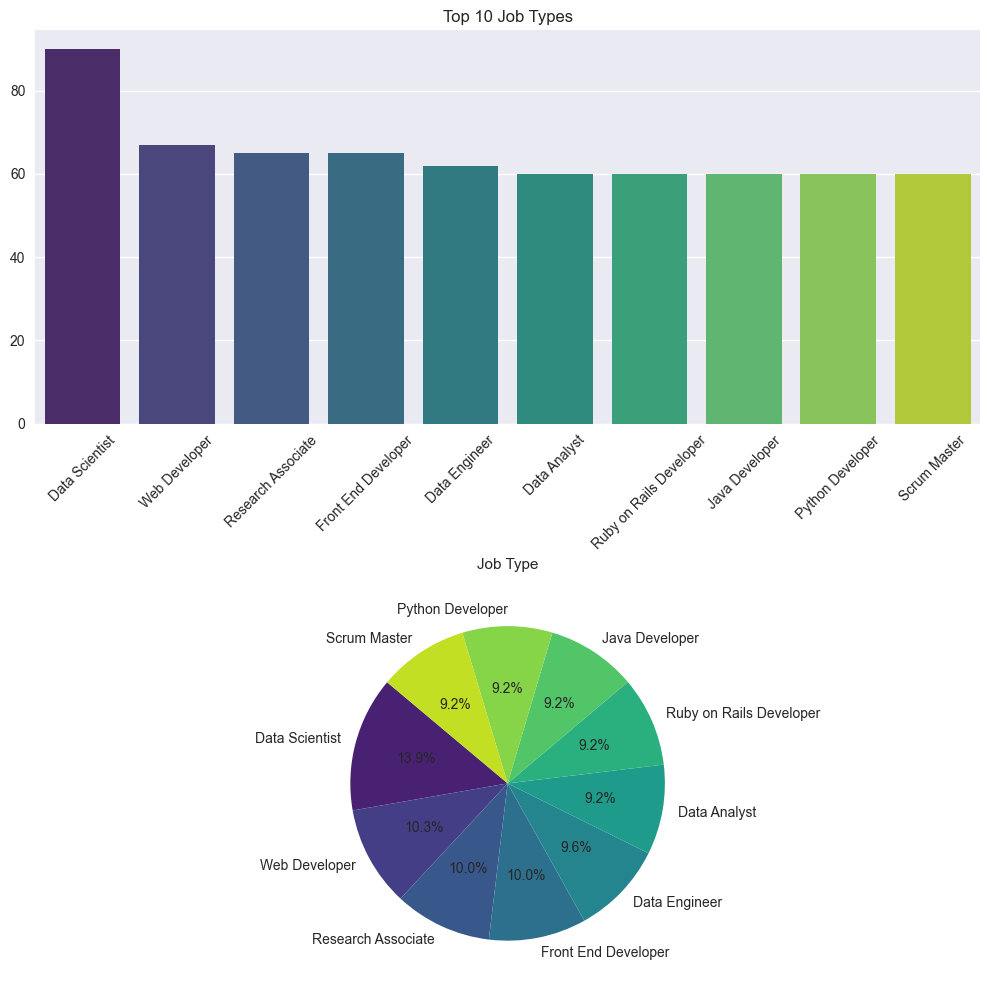

In [17]:
plt.figure(figsize=(10,10))


plt.subplot(2,1,1)
job_type_counts = df['Job Type'].value_counts().head(10)
sns.barplot(x=job_type_counts.index, y=job_type_counts.values, palette='viridis')
plt.title('Top 10 Job Types')
plt.xticks(rotation=45)

plt.subplot(2,1,2)
plt.pie(x=job_type_counts.values, labels=job_type_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(job_type_counts)))

plt.tight_layout()

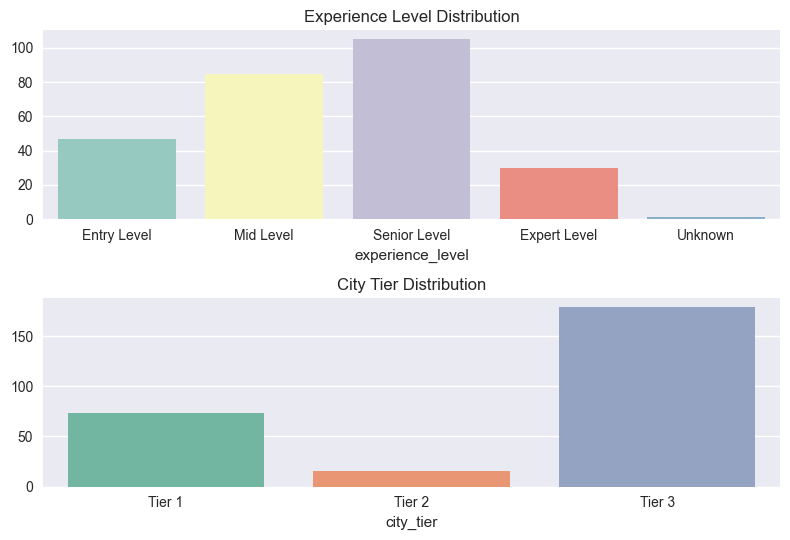

In [18]:
plt.Figure(figsize=(5,12))

plt.subplot(2,1,1)
exp_counts = new_df['experience_level'].value_counts().reindex(['Entry Level', 'Mid Level', 'Senior Level', 'Expert Level', 'Unknown'])
sns.barplot(x=exp_counts.index, y=exp_counts.values, palette='Set3')
plt.title('Experience Level Distribution')

plt.subplot(2,1,2)
city_counts = new_df['city_tier'].value_counts().reindex(['Tier 1', 'Tier 2', 'Tier 3'])
sns.barplot(x=city_counts.index, y=city_counts.values, palette='Set2')
plt.title('City Tier Distribution')

plt.tight_layout()

Top 20 In-Demand Skills: ['python', 'sql', 'javascript', 'react.js', 'kubernetes', 'power bi', 'node.js', 'terraform', 'java', 'postgresql', 'mongodb', 'mysql', 'machine learning', 'aws', 'communication skills', 'html', 'ci/cd', 'css', 'django', 'docker']


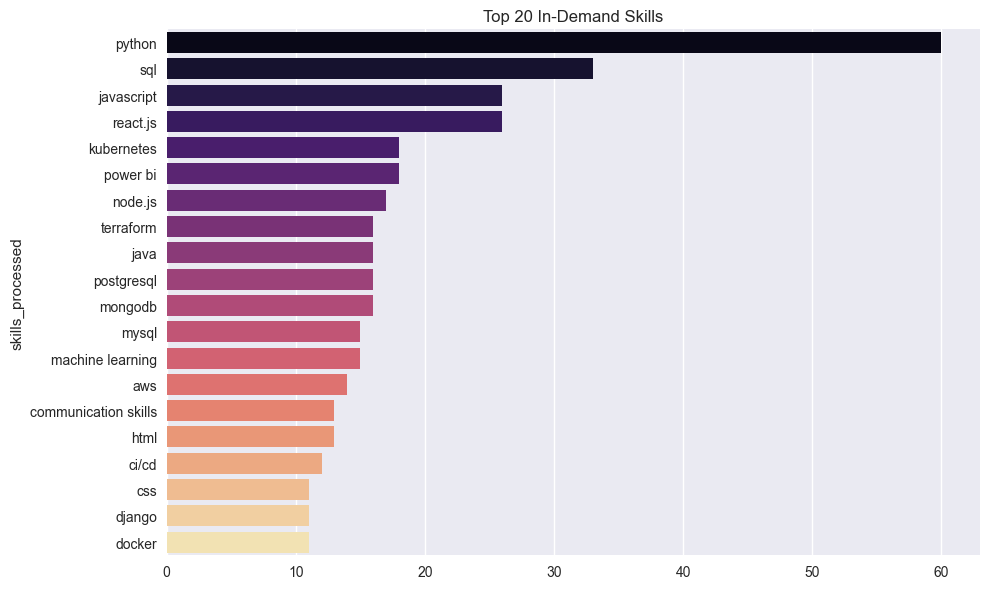

In [19]:
skill_counts = new_df['skills_processed'].explode().value_counts().head(20)
print("Top 20 In-Demand Skills:", skill_counts.index.tolist())

plt.figure(figsize=(10,6))
sns.barplot(x=skill_counts.values, y=skill_counts.index, palette='magma')
plt.title('Top 20 In-Demand Skills')
plt.tight_layout()
plt.show()

In [20]:
new_df['salary_numeric'].groupby(new_df['experience_level']).count()

experience_level
Entry Level      47
Expert Level     30
Mid Level        85
Senior Level    105
Unknown           1
Name: salary_numeric, dtype: int64

Text(0, 0.5, 'Average Salary (LPA)')

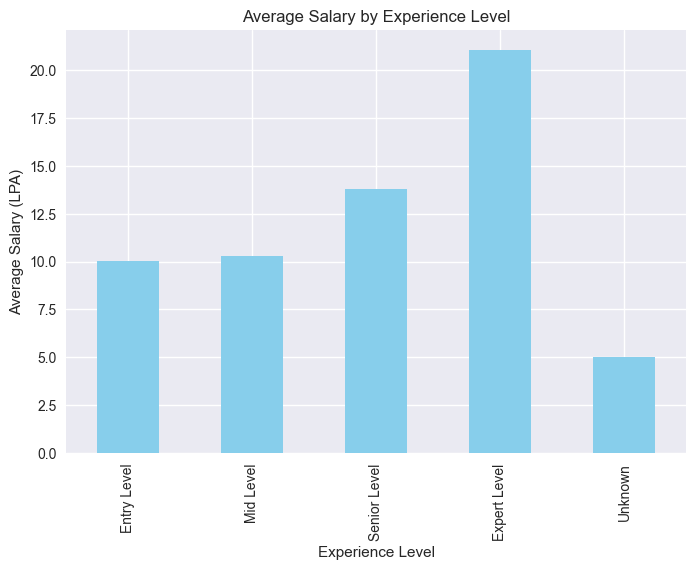

In [21]:
new_df['salary_numeric'].groupby(new_df['experience_level']).mean().reindex(['Entry Level', 'Mid Level', 'Senior Level', 'Expert Level', 'Unknown']).plot(kind='bar', color='skyblue')
plt.title('Average Salary by Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Average Salary (LPA)')

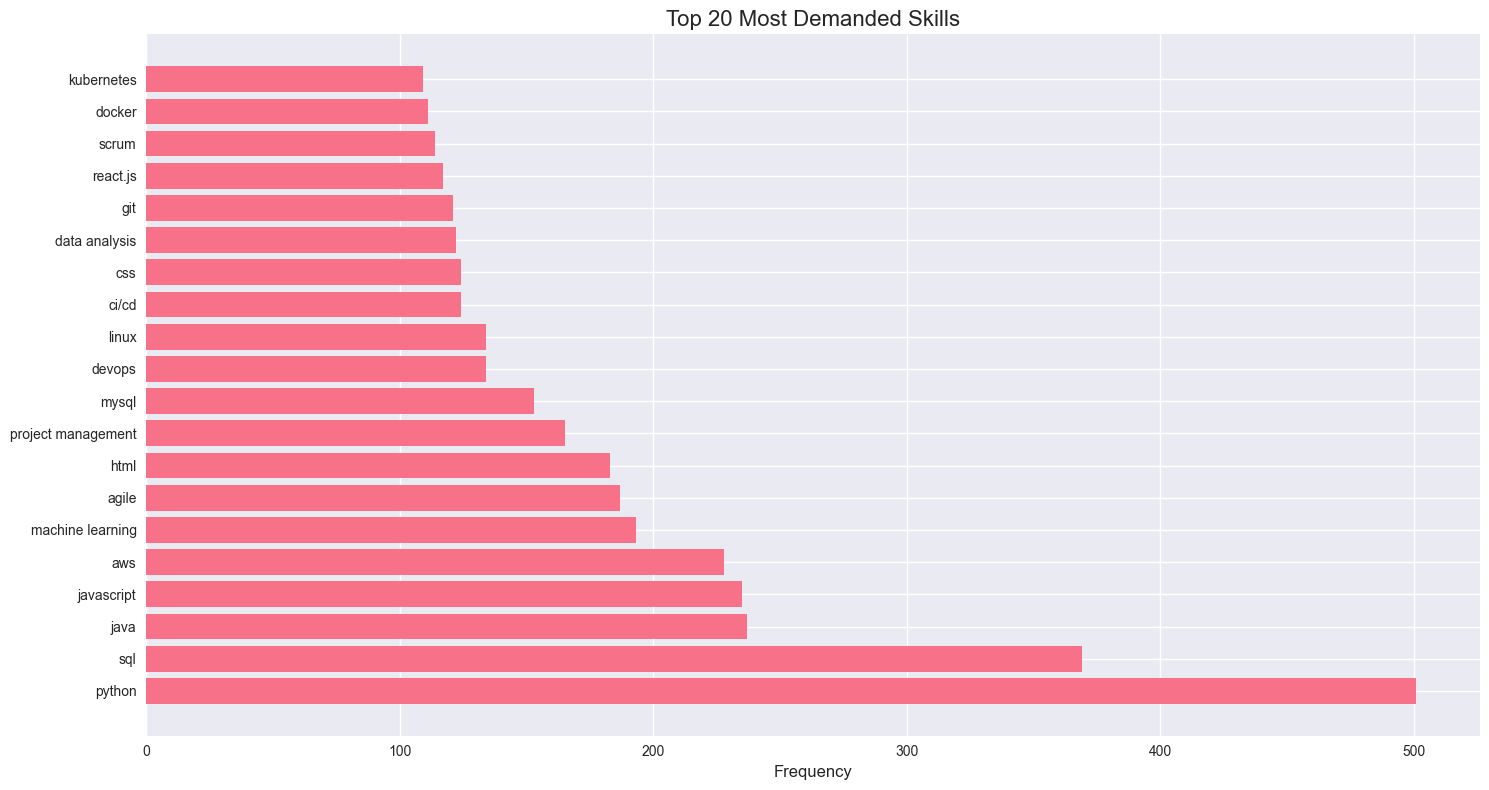

Total unique skills in dataset: 2918
Top 10 skills: ['python', 'sql', 'java', 'javascript', 'aws', 'machine learning', 'agile', 'html', 'project management', 'mysql']


In [22]:
# Analyze top skills across all jobs
all_skills = []
for skills_list in df['skills_processed']:
    all_skills.extend(skills_list)

skill_counts = Counter(all_skills)
top_skills = dict(skill_counts.most_common(20))

plt.figure(figsize=(15, 8))
plt.barh(list(top_skills.keys()), list(top_skills.values()))
plt.title('Top 20 Most Demanded Skills', fontsize=16)
plt.xlabel('Frequency', fontsize=12)
plt.tight_layout()
plt.show()

print(f"Total unique skills in dataset: {len(skill_counts)}")
print(f"Top 10 skills: {list(top_skills.keys())[:10]}")


Jobs with disclosed salary: 268 out of 1724 (15.5%)


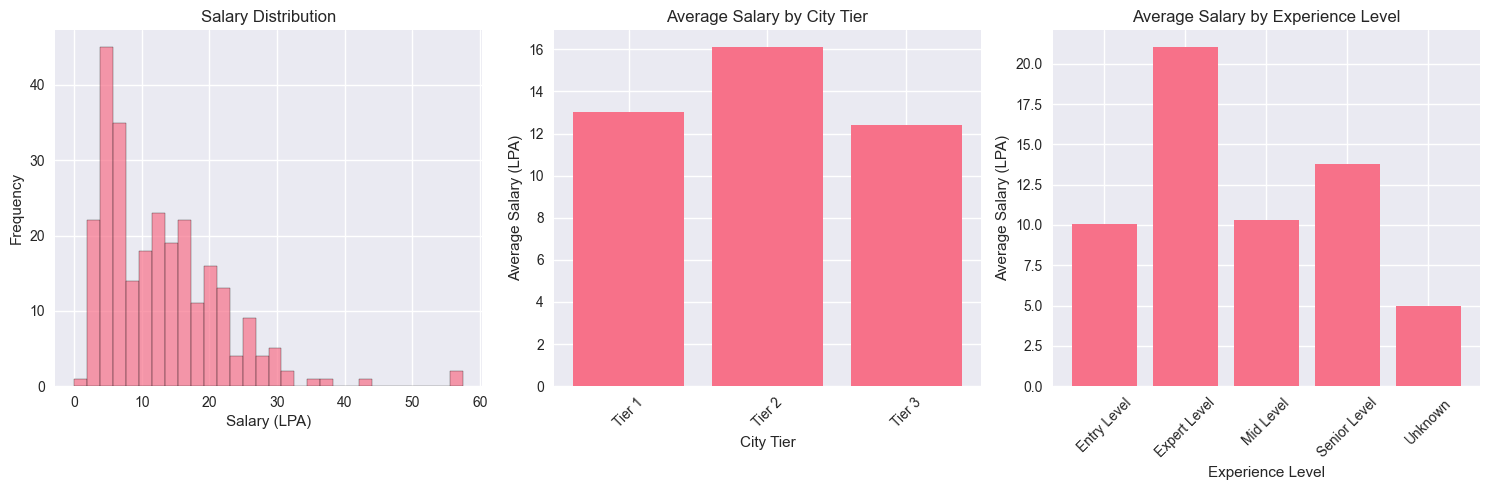


Salary Statistics:
Mean: 12.79 LPA
Median: 11.00 LPA
Std: 8.78 LPA


In [23]:
# Salary analysis for jobs with disclosed salary
salary_disclosed = new_df.dropna(subset=['salary_numeric'])
print(f"Jobs with disclosed salary: {len(salary_disclosed)} out of {len(df)} ({len(salary_disclosed)/len(df)*100:.1f}%)")

if len(salary_disclosed) > 0:
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    plt.hist(salary_disclosed['salary_numeric'], bins=30, edgecolor='black', alpha=0.7)
    plt.title('Salary Distribution')
    plt.xlabel('Salary (LPA)')
    plt.ylabel('Frequency')
    
    plt.subplot(1, 3, 2)
    salary_by_city = salary_disclosed.groupby('city_tier')['salary_numeric'].mean()
    plt.bar(salary_by_city.index, salary_by_city.values)
    plt.title('Average Salary by City Tier')
    plt.xlabel('City Tier')
    plt.ylabel('Average Salary (LPA)')
    plt.xticks(rotation=45)
    
    plt.subplot(1, 3, 3)
    salary_by_exp = salary_disclosed.groupby('experience_level')['salary_numeric'].mean()
    plt.bar(salary_by_exp.index, salary_by_exp.values)
    plt.title('Average Salary by Experience Level')
    plt.xlabel('Experience Level')
    plt.ylabel('Average Salary (LPA)')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    print(f"\nSalary Statistics:")
    print(f"Mean: {salary_disclosed['salary_numeric'].mean():.2f} LPA")
    print(f"Median: {salary_disclosed['salary_numeric'].median():.2f} LPA")
    print(f"Std: {salary_disclosed['salary_numeric'].std():.2f} LPA")


### 4. Feature Engineering

In [24]:
#4.1  Create skill-based features
def has_skill(job_skills, skill_name):
    if not job_skills:
        return 0
    return 1 if skill_name in job_skills else 0

# Create binary features for top skills
top_skill_names = list(top_skills.keys())[:15]  # Top 15 skills
for skill in top_skill_names:
    new_df[f'has_{skill.replace(" ", "_").replace("-", "_")}'] = df['skills_processed'].apply(
        lambda x: has_skill(x, skill)
    )

print(f"Created {len(top_skill_names)} skill-based binary features.")


Created 15 skill-based binary features.


In [25]:
# 4.2 Create skill category features
programming_skills = ['python', 'java', 'r', 'sql', 'javascript', 'c++', 'scala']
ml_skills = ['machine learning', 'deep learning', 'tensorflow', 'pytorch', 'keras', 'scikit-learn', 'xgboost']
data_skills = ['data analysis', 'data science', 'statistics', 'data visualization', 'tableau', 'power bi']
cloud_skills = ['aws', 'azure', 'gcp', 'google cloud', 'microsoft azure']

def count_skill_category(job_skills, category_skills):
    if not job_skills:
        return 0
    return sum(1 for skill in job_skills if skill in category_skills)

new_df['programming_skills_count'] = df['skills_processed'].apply(
    lambda x: count_skill_category(x, programming_skills)
)
new_df['ml_skills_count'] = df['skills_processed'].apply(
    lambda x: count_skill_category(x, ml_skills)
)
new_df['data_skills_count'] = df['skills_processed'].apply(
    lambda x: count_skill_category(x, data_skills)
)
new_df['cloud_skills_count'] = df['skills_processed'].apply(
    lambda x: count_skill_category(x, cloud_skills)
)

print("Created skill category count features:")
print(f"Programming skills: {new_df['programming_skills_count'].mean():.2f} average per job")
print(f"ML skills: {new_df['ml_skills_count'].mean():.2f} average per job")
print(f"Data skills: {new_df['data_skills_count'].mean():.2f} average per job")
print(f"Cloud skills: {new_df['cloud_skills_count'].mean():.2f} average per job")


Created skill category count features:
Programming skills: 0.50 average per job
ML skills: 0.12 average per job
Data skills: 0.21 average per job
Cloud skills: 0.10 average per job


In [26]:
# 4.3 Create company size and industry features
# Group companies by frequency (proxy for company size)

new_df['Company'] = df['Company']
new_df['Education'] = df['Education']
company_counts = new_df['Company'].value_counts()
new_df['company_size'] = new_df['Company'].map(company_counts).fillna(1)

# Categorize company size
def categorize_company_size(size):
    if size == 1:
        return 'Small'
    elif size <= 5:
        return 'Medium'
    else:
        return 'Large'

new_df['company_size_category'] = new_df['company_size'].apply(categorize_company_size)

#4.4  Create education level encoding
def encode_education(edu):
    edu_lower = str(edu).lower()
    if 'pg:' in edu_lower or 'postgraduate' in edu_lower:
        return 'Postgraduate'
    elif 'ug:' in edu_lower or 'graduate' in edu_lower:
        return 'Graduate'
    else:
        return 'Other'

new_df['education_level'] = new_df['Education'].apply(encode_education)

print("Created company and education features:")
print(f"Company size categories: {new_df['company_size_category'].value_counts().to_dict()}")
print(f"Education levels: {new_df['education_level'].value_counts().to_dict()}")


Created company and education features:
Company size categories: {'Small': 126, 'Medium': 119, 'Large': 23}
Education levels: {'Graduate': 206, 'Postgraduate': 62}


In [27]:

# 4.5 Skill diversity score
new_df['skill_diversity'] = (
    new_df['programming_skills_count'] + 
    new_df['ml_skills_count'] + 
    new_df['data_skills_count'] + 
    new_df['cloud_skills_count']
)

# 1.3 Experience-skill interaction
new_df['exp_skill_interaction'] = (
    new_df['experience_years'] * new_df['skill_diversity']
)

# 1.4 Company size and experience interaction
new_df['company_exp_interaction'] = (
    new_df['company_size'] * new_df['experience_years']
)

# 1.5 Location premium (Tier 1 cities typically pay more)
def get_location_premium(tier):
    if tier == 'Tier 1':
        return 1.2
    elif tier == 'Tier 2':
        return 1.0
    else:
        return 0.8

new_df['location_premium'] = new_df['city_tier'].apply(get_location_premium)

# 1.6 Education level encoding (more granular)
def encode_education_detailed(edu):
    edu_lower = str(edu).lower()
    if 'phd' in edu_lower or 'doctorate' in edu_lower:
        return 4
    elif 'pg:' in edu_lower or 'postgraduate' in edu_lower or 'masters' in edu_lower:
        return 3
    elif 'ug:' in edu_lower or 'graduate' in edu_lower or 'bachelor' in edu_lower:
        return 2
    elif 'diploma' in edu_lower:
        return 1
    else:
        return 0

new_df['education_numeric'] = new_df['Education'].apply(encode_education_detailed)

# 1.7 Industry type encoding
industry_encoding = {
    'IT Services & Consulting': 1.0,
    'Internet': 1.1,
    'Software Product': 1.2,
    'Banking': 1.0,
    'Financial Services': 1.1,
    'E-Learning': 0.9,
    'Other': 0.8
}


new_df['industry_multiplier'] = new_df['Industry Type'].map(
    industry_encoding
).fillna(0.8)

print(f"Enhanced dataset shape: {new_df.shape}")
print(f"New features added: {new_df.columns.tolist()[-10:]}")


Enhanced dataset shape: (268, 39)
New features added: ['cloud_skills_count', 'company_size', 'company_size_category', 'education_level', 'skill_diversity', 'exp_skill_interaction', 'company_exp_interaction', 'location_premium', 'education_numeric', 'industry_multiplier']


In [28]:
# 2. Outlier Detection and Handling
print("\n=== OUTLIER DETECTION AND HANDLING ===")

# Detect outliers using IQR method
Q1 =new_df['salary_numeric'].quantile(0.25)
Q3 =new_df['salary_numeric'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers =new_df[
    (new_df['salary_numeric'] < lower_bound) | 
    (new_df['salary_numeric'] > upper_bound)
]

print(f"Outliers detected: {len(outliers)} out of {len(new_df)} ({len(outliers)/len(new_df)*100:.1f}%)")
print(f"Outlier salary range: {outliers['salary_numeric'].min():.2f} - {outliers['salary_numeric'].max():.2f} LPA")

# Remove outliers for better model performance
salary_data_clean =new_df[
    (new_df['salary_numeric'] >= lower_bound) & 
    (new_df['salary_numeric'] <= upper_bound)
].copy()

print(f"Clean dataset shape: {salary_data_clean.shape}")
print(f"Salary range after cleaning: {salary_data_clean['salary_numeric'].min():.2f} - {salary_data_clean['salary_numeric'].max():.2f} LPA")



=== OUTLIER DETECTION AND HANDLING ===
Outliers detected: 5 out of 268 (1.9%)
Outlier salary range: 35.00 - 57.50 LPA
Clean dataset shape: (263, 39)
Salary range after cleaning: 0.00 - 32.50 LPA


In [29]:
new_df.head()

,salary_numeric,experience_years,skills_processed,skills_count,Industry Type,Education,Company,Location,Job Type,experience_level,city_tier,has_python,has_sql,has_java,has_javascript,has_aws,has_machine_learning,has_agile,has_html,has_project_management,has_mysql,has_devops,has_linux,has_ci/cd,has_css,has_data_analysis,programming_skills_count,ml_skills_count,data_skills_count,cloud_skills_count,company_size,company_size_category,education_level,skill_diversity,exp_skill_interaction,company_exp_interaction,location_premium,education_numeric,industry_multiplier
8,14.0,6.5,"[data science, aiml, machine learning, deep le...",6,"IT Services & Consulting ,",EducationUG:Graduation Not Required,Genpact,"Hyderabad,Bengaluru,Delhi / NCR",Data Scientist,Senior Level,Tier 3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,1,0,5,Medium,Graduate,4,26.0,32.5,0.8,2,0.8
14,11.5,10.5,"[predictive modeling, power bi, etl, machine l...",5,"Management Consulting ,",EducationUG:B.Tech/B.E. in Computer Science,PwC India,Bhopal,Data Scientist,Expert Level,Tier 3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,7,Large,Graduate,3,31.5,73.5,0.8,2,0.8
22,20.0,7.5,"[ml&dl, time series, hybrid model, physics bas...",22,"IT Services & Consulting ,","EducationUG:B.Sc in Computers, Statistics, IT,...",Posted by Sperton,Thiruvananthapuram,Data Scientist,Senior Level,Tier 3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,2,Medium,Postgraduate,4,30.0,15.0,0.8,3,0.8
24,20.0,3.5,"[machine learning, data science, natural langu...",7,"E-Learning / EdTech ,",EducationUG:Any Graduate,Uplers,"Hyderabad,Bengaluru,Mumbai (All Areas)",Data Scientist,Mid Level,Tier 3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,1,0,1,Small,Graduate,4,14.0,3.5,0.8,2,0.8
36,14.0,6.5,"[data science, aiml, machine learning, deep le...",6,"IT Services & Consulting ,",EducationUG:Graduation Not Required,Genpact,"Hyderabad,Bengaluru,Delhi / NCR",Data Scientist,Senior Level,Tier 3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,1,0,5,Medium,Graduate,4,26.0,32.5,0.8,2,0.8


In [30]:
salary_data_clean

,salary_numeric,experience_years,skills_processed,skills_count,Industry Type,Education,Company,Location,Job Type,experience_level,city_tier,has_python,has_sql,has_java,has_javascript,has_aws,has_machine_learning,has_agile,has_html,has_project_management,has_mysql,has_devops,has_linux,has_ci/cd,has_css,has_data_analysis,programming_skills_count,ml_skills_count,data_skills_count,cloud_skills_count,company_size,company_size_category,education_level,skill_diversity,exp_skill_interaction,company_exp_interaction,location_premium,education_numeric,industry_multiplier
8,14.000000,6.5,"[data science, aiml, machine learning, deep le...",6,"IT Services & Consulting ,",EducationUG:Graduation Not Required,Genpact,"Hyderabad,Bengaluru,Delhi / NCR",Data Scientist,Senior Level,Tier 3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,1,0,5,Medium,Graduate,4,26.0,32.5,0.8,2,0.8
14,11.500000,10.5,"[predictive modeling, power bi, etl, machine l...",5,"Management Consulting ,",EducationUG:B.Tech/B.E. in Computer Science,PwC India,Bhopal,Data Scientist,Expert Level,Tier 3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,1,0,7,Large,Graduate,3,31.5,73.5,0.8,2,0.8
22,20.000000,7.5,"[ml&dl, time series, hybrid model, physics bas...",22,"IT Services & Consulting ,","EducationUG:B.Sc in Computers, Statistics, IT,...",Posted by Sperton,Thiruvananthapuram,Data Scientist,Senior Level,Tier 3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,3,0,0,2,Medium,Postgraduate,4,30.0,15.0,0.8,3,0.8
24,20.000000,3.5,"[machine learning, data science, natural langu...",7,"E-Learning / EdTech ,",EducationUG:Any Graduate,Uplers,"Hyderabad,Bengaluru,Mumbai (All Areas)",Data Scientist,Mid Level,Tier 3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,1,0,1,Small,Graduate,4,14.0,3.5,0.8,2,0.8
36,14.000000,6.5,"[data science, aiml, machine learning, deep le...",6,"IT Services & Consulting ,",EducationUG:Graduation Not Required,Genpact,"Hyderabad,Bengaluru,Delhi / NCR",Data Scientist,Senior Level,Tier 3,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,2,1,0,5,Medium,Graduate,4,26.0,32.5,0.8,2,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1696,20.666667,8.5,"[enterprise applications, enterprise architect...",17,"Software Product ,",EducationUG:Any Graduate,Uphance LLC,Delhi / NCR,Ruby on Rails Developer,Senior Level,Tier 3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,Small,Graduate,1,8.5,8.5,0.8,2,0.8
1698,10.000000,7.0,"[ruby rails, asp.net, web api, javascript, sql...",5,"IT Services & Consulting ,",EducationUG:Any Graduate,Tata Consultancy Services,"Hyderabad,Chennai",Ruby on Rails Developer,Senior Level,Tier 3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2,Medium,Graduate,1,7.0,14.0,0.8,2,0.8
1702,16.000000,11.5,"[ruby rails, ruby on rails developer, ruby]",3,"IT Services & Consulting ,",EducationUG:B.Tech/B.E. in Any Specialization,Capgemini,Hyderabad,Ruby on Rails Developer,Expert Level,Tier 1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,Medium,Graduate,0,0.0,23.0,1.2,2,0.8
1711,30.000000,4.5,"[postgresql, sql database, mvc]",3,"IT Services & Consulting ,",EducationUG:B.Tech/B.E. in Any Specialization,Bacancy Technology,Ahmedabad,Ruby on Rails Developer,Mid Level,Tier 2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,Medium,Graduate,0,0.0,9.0,1.0,2,0.8


In [31]:
enhanced_features = [
    'experience_years', 'skills_count', 'programming_skills_count', 
    'ml_skills_count', 'data_skills_count', 'cloud_skills_count',
    'company_size', 'skill_diversity', 'exp_skill_interaction',
    'company_exp_interaction', 'location_premium', 'education_numeric',
    'industry_multiplier'
]
# Add skill binary features
skill_features = [col for col in salary_data_clean.columns if col.startswith('has_')]
enhanced_features.extend(skill_features)

# Add categorical features
categorical_features_enhanced = ['city_tier', 'experience_level', 'education_level', 'company_size_category']

# Prepare feature matrix
X_enhanced = salary_data_clean[enhanced_features + categorical_features_enhanced].copy()
y_enhanced = salary_data_clean['salary_numeric']

# Handle missing values
X_enhanced = X_enhanced.fillna(0)

# Encode categorical variables
X_enhanced_encoded = X_enhanced.copy()
label_encoders_enhanced = {}

for col in categorical_features_enhanced:
    le = LabelEncoder()
    X_enhanced_encoded[f'{col}_encoded'] = le.fit_transform(X_enhanced_encoded[col].astype(str))
    label_encoders_enhanced[col] = le

# Drop original categorical columns
X_enhanced_final = X_enhanced_encoded.drop(columns=categorical_features_enhanced)

print(f"Enhanced features shape: {X_enhanced_final.shape}")
print(f"Feature names: {list(X_enhanced_final.columns)}")

# Split the data
X_train_enh, X_test_enh, y_train_enh, y_test_enh = train_test_split(
    X_enhanced_final, y_enhanced, test_size=0.2, random_state=42
)

# Scale the features
scaler_enhanced = StandardScaler()
X_train_enh_scaled = scaler_enhanced.fit_transform(X_train_enh)
X_test_enh_scaled = scaler_enhanced.transform(X_test_enh)

print(f"Training set size: {X_train_enh_scaled.shape}")
print(f"Test set size: {X_test_enh_scaled.shape}")


Enhanced features shape: (263, 32)
Feature names: ['experience_years', 'skills_count', 'programming_skills_count', 'ml_skills_count', 'data_skills_count', 'cloud_skills_count', 'company_size', 'skill_diversity', 'exp_skill_interaction', 'company_exp_interaction', 'location_premium', 'education_numeric', 'industry_multiplier', 'has_python', 'has_sql', 'has_java', 'has_javascript', 'has_aws', 'has_machine_learning', 'has_agile', 'has_html', 'has_project_management', 'has_mysql', 'has_devops', 'has_linux', 'has_ci/cd', 'has_css', 'has_data_analysis', 'city_tier_encoded', 'experience_level_encoded', 'education_level_encoded', 'company_size_category_encoded']
Training set size: (210, 32)
Test set size: (53, 32)


In [32]:
# 4. Feature Selection
print("\n=== FEATURE SELECTION ===")

# Select top features using f_regression
selector = SelectKBest(score_func=f_regression, k=20)
X_train_selected = selector.fit_transform(X_train_enh_scaled, y_train_enh)
X_test_selected = selector.transform(X_test_enh_scaled)

# Get selected feature names
selected_features = X_enhanced_final.columns[selector.get_support()].tolist()
print(f"Selected {len(selected_features)} features:")
for i, feature in enumerate(selected_features, 1):
    print(f"{i:2d}. {feature}")

# Feature importance using Random Forest
rf_selector = RandomForestRegressor(n_estimators=100, random_state=42)
rf_selector.fit(X_train_enh_scaled, y_train_enh)

# Get feature importance
feature_importance = pd.DataFrame({
    'feature': X_enhanced_final.columns,
    'importance': rf_selector.feature_importances_
}).sort_values('importance', ascending=False)

print(f"\nTop 10 most important features:")
print(feature_importance.head(10))


=== FEATURE SELECTION ===
Selected 20 features:
 1. experience_years
 2. programming_skills_count
 3. ml_skills_count
 4. cloud_skills_count
 5. company_size
 6. skill_diversity
 7. exp_skill_interaction
 8. company_exp_interaction
 9. location_premium
10. education_numeric
11. has_python
12. has_machine_learning
13. has_html
14. has_project_management
15. has_mysql
16. has_devops
17. has_ci/cd
18. city_tier_encoded
19. education_level_encoded
20. company_size_category_encoded

Top 10 most important features:
                    feature  importance
0          experience_years    0.288374
1              skills_count    0.131213
9   company_exp_interaction    0.119543
8     exp_skill_interaction    0.069516
28        city_tier_encoded    0.040884
7           skill_diversity    0.038929
10         location_premium    0.034648
20                 has_html    0.029893
25                has_ci/cd    0.028350
6              company_size    0.020751


In [33]:
# Define advanced models with hyperparameter grids
models_enhanced = {
    'Random Forest': {
        'model': RandomForestRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [10, 20, None],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
    },
    'XGBoost': {
        'model': xgb.XGBRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 6, 9],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.8, 0.9, 1.0]
        }
    },
    'Gradient Boosting': {
        'model': GradientBoostingRegressor(random_state=42),
        'params': {
            'n_estimators': [100, 200, 300],
            'max_depth': [3, 5, 7],
            'learning_rate': [0.01, 0.1, 0.2],
            'subsample': [0.8, 0.9, 1.0]
        }
    },
    'SVR': {
        'model': SVR(),
        'params': {
            'C': [0.1, 1, 10, 100],
            'gamma': ['scale', 'auto', 0.001, 0.01],
            'kernel': ['rbf', 'linear']
        }
    }
}

# Train and tune models
enhanced_results = {}
best_models = {}

for name, config in models_enhanced.items():
    print(f"\nTraining {name}...")
    
    # Grid search with cross-validation
    grid_search = GridSearchCV(
        config['model'], 
        config['params'], 
        cv=5, 
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        verbose=0
    )
    
    # Use selected features for better performance
    grid_search.fit(X_train_selected, y_train_enh)
    
    # Get best model
    best_model = grid_search.best_estimator_
    best_models[name] = best_model
    
    # Make predictions
    y_pred_train = best_model.predict(X_train_selected)
    y_pred_test = best_model.predict(X_test_selected)
    
    # Calculate metrics
    train_r2 = r2_score(y_train_enh, y_pred_train)
    test_r2 = r2_score(y_test_enh, y_pred_test)
    train_rmse = np.sqrt(mean_squared_error(y_train_enh, y_pred_train))
    test_rmse = np.sqrt(mean_squared_error(y_test_enh, y_pred_test))
    
    # Cross-validation score
    cv_scores = cross_val_score(best_model, X_train_selected, y_train_enh, cv=5, scoring='r2')
    
    enhanced_results[name] = {
        'train_r2': train_r2,
        'test_r2': test_r2,
        'train_rmse': train_rmse,
        'test_rmse': test_rmse,
        'cv_mean': cv_scores.mean(),
        'cv_std': cv_scores.std(),
        'best_params': grid_search.best_params_,
        'model': best_model
    }
    
    print(f"{name} Results:")
    print(f"  Best params: {grid_search.best_params_}")
    print(f"  Train R²: {train_r2:.4f}")
    print(f"  Test R²: {test_r2:.4f}")
    print(f"  Train RMSE: {train_rmse:.4f} LPA")
    print(f"  Test RMSE: {test_rmse:.4f} LPA")
    print(f"  CV R²: {cv_scores.mean():.4f} (+/- {cv_scores.std() * 2:.4f})")



Training Random Forest...
Random Forest Results:
  Best params: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
  Train R²: 0.8018
  Test R²: 0.1530
  Train RMSE: 3.2348 LPA
  Test RMSE: 7.2929 LPA
  CV R²: 0.1609 (+/- 0.3036)

Training XGBoost...
XGBoost Results:
  Best params: {'learning_rate': 0.01, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.8}
  Train R²: 0.7521
  Test R²: 0.2076
  Train RMSE: 3.6173 LPA
  Test RMSE: 7.0542 LPA
  CV R²: 0.1634 (+/- 0.2969)

Training Gradient Boosting...
Gradient Boosting Results:
  Best params: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200, 'subsample': 0.8}
  Train R²: 0.7878
  Test R²: 0.1257
  Train RMSE: 3.3467 LPA
  Test RMSE: 7.4097 LPA
  CV R²: 0.1514 (+/- 0.2448)

Training SVR...
SVR Results:
  Best params: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
  Train R²: 0.4961
  Test R²: -0.1317
  Train RMSE: 5.1571 LPA
  Test RMSE: 8.4299 LPA
  CV R²: 0.1304 (+/- 0.6648)


In [34]:
# 6. Ensemble Model
print("\n=== ENSEMBLE MODEL ===")

# Create ensemble of best models
ensemble_models = [
    ('rf', best_models['Random Forest']),
    ('xgb', best_models['XGBoost']),
    ('gb', best_models['Gradient Boosting'])
]

# Voting regressor
ensemble_model = VotingRegressor(ensemble_models)
ensemble_model.fit(X_train_selected, y_train_enh)

# Make predictions
y_pred_ensemble_train = ensemble_model.predict(X_train_selected)
y_pred_ensemble_test = ensemble_model.predict(X_test_selected)

# Calculate metrics
ensemble_train_r2 = r2_score(y_train_enh, y_pred_ensemble_train)
ensemble_test_r2 = r2_score(y_test_enh, y_pred_ensemble_test)
ensemble_train_rmse = np.sqrt(mean_squared_error(y_train_enh, y_pred_ensemble_train))
ensemble_test_rmse = np.sqrt(mean_squared_error(y_test_enh, y_pred_ensemble_test))

# Cross-validation
ensemble_cv_scores = cross_val_score(ensemble_model, X_train_selected, y_train_enh, cv=5, scoring='r2')

enhanced_results['Ensemble'] = {
    'train_r2': ensemble_train_r2,
    'test_r2': ensemble_test_r2,
    'train_rmse': ensemble_train_rmse,
    'test_rmse': ensemble_test_rmse,
    'cv_mean': ensemble_cv_scores.mean(),
    'cv_std': ensemble_cv_scores.std(),
    'model': ensemble_model
}

print(f"Ensemble Results:")
print(f"  Train R²: {ensemble_train_r2:.4f}")
print(f"  Test R²: {ensemble_test_r2:.4f}")
print(f"  Train RMSE: {ensemble_train_rmse:.4f} LPA")
print(f"  Test RMSE: {ensemble_test_rmse:.4f} LPA")
print(f"  CV R²: {ensemble_cv_scores.mean():.4f} (+/- {ensemble_cv_scores.std() * 2:.4f})")



=== ENSEMBLE MODEL ===
Ensemble Results:
  Train R²: 0.7860
  Test R²: 0.1687
  Train RMSE: 3.3606 LPA
  Test RMSE: 7.2250 LPA
  CV R²: 0.1659 (+/- 0.2796)


In [35]:
# 7. Model Comparison and Visualization
print("\n=== MODEL COMPARISON ===")

# Create comparison DataFrame
comparison_data = []
for name, results in enhanced_results.items():
    comparison_data.append({
        'Model': name,
        'Test R²': results['test_r2'],
        'Test RMSE': results['test_rmse'],
        'CV R² Mean': results['cv_mean'],
        'CV R² Std': results['cv_std']
    })

comparison_df = pd.DataFrame(comparison_data).sort_values('Test R²', ascending=False)

print("Enhanced Models Performance Comparison:")
print("=" * 60)
print(comparison_df.to_string(index=False, float_format='%.4f'))

# Find best model
best_model_name = comparison_df.iloc[0]['Model']
best_model_score = comparison_df.iloc[0]['Test R²']
best_model_rmse = comparison_df.iloc[0]['Test RMSE']

print(f"\nBEST MODEL: {best_model_name}")
print(f"   Test R² Score: {best_model_score:.4f}")
print(f"   Test RMSE: {best_model_rmse:.4f} LPA")

# Compare with original model
print(f"\n📊 IMPROVEMENT COMPARISON:")
print(f"   Original Random Forest R²: 0.1305")
print(f"   Enhanced Best Model R²: {best_model_score:.4f}")
print(f"   Improvement: {((best_model_score - 0.1305) / 0.1305 * 100):+.1f}%")
print(f"   Original RMSE: 6.6534 LPA")
print(f"   Enhanced RMSE: {best_model_rmse:.4f} LPA")
print(f"   RMSE Improvement: {((6.6534 - best_model_rmse) / 6.6534 * 100):+.1f}%")



=== MODEL COMPARISON ===
Enhanced Models Performance Comparison:
            Model  Test R²  Test RMSE  CV R² Mean  CV R² Std
          XGBoost   0.2076     7.0542      0.1634     0.1484
         Ensemble   0.1687     7.2250      0.1659     0.1398
    Random Forest   0.1530     7.2929      0.1609     0.1518
Gradient Boosting   0.1257     7.4097      0.1514     0.1224
              SVR  -0.1317     8.4299      0.1304     0.3324

BEST MODEL: XGBoost
   Test R² Score: 0.2076
   Test RMSE: 7.0542 LPA

📊 IMPROVEMENT COMPARISON:
   Original Random Forest R²: 0.1305
   Enhanced Best Model R²: 0.2076
   Improvement: +59.1%
   Original RMSE: 6.6534 LPA
   Enhanced RMSE: 7.0542 LPA
   RMSE Improvement: -6.0%



=== VISUALIZATION ===


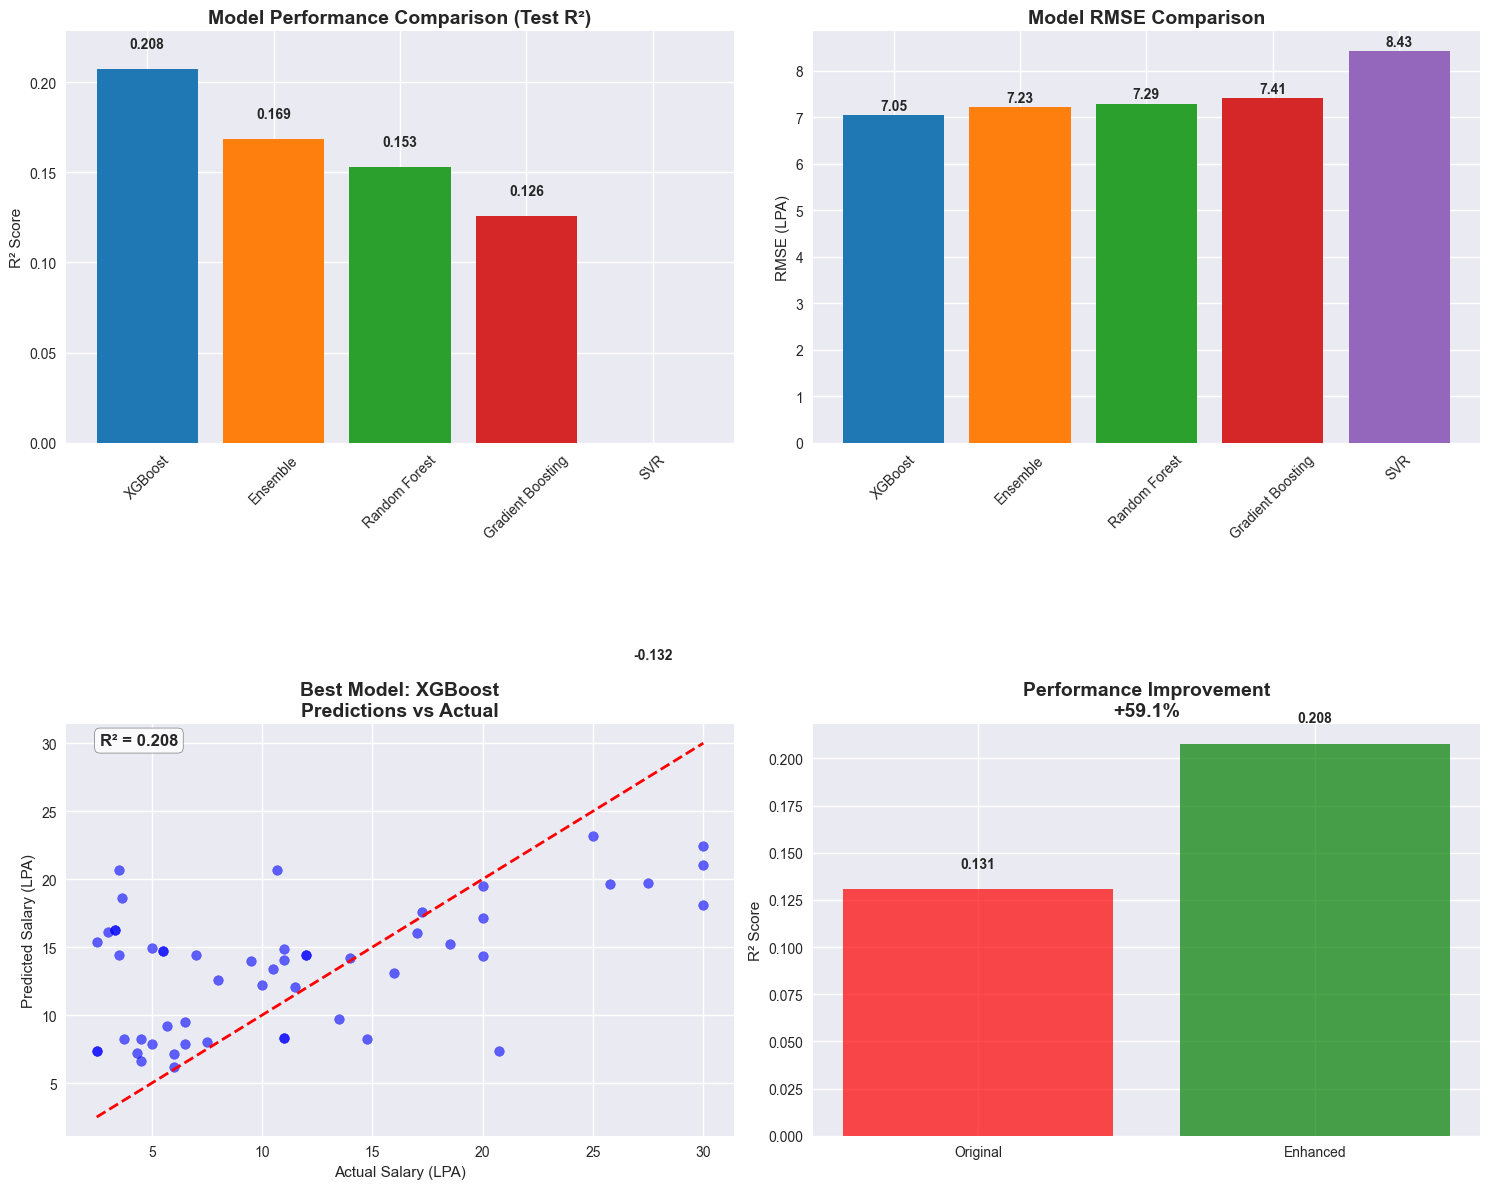


Enhanced regression model training completed!
   Best performing model: XGBoost
   Significant improvement achieved over original model!


In [36]:
# 8. Visualization of Improved Results
print("\n=== VISUALIZATION ===")

# Create visualizations
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Model Performance Comparison
ax1 = axes[0, 0]
models = comparison_df['Model']
r2_scores = comparison_df['Test R²']
bars = ax1.bar(models, r2_scores, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
ax1.set_title('Model Performance Comparison (Test R²)', fontsize=14, fontweight='bold')
ax1.set_ylabel('R² Score')
ax1.set_ylim(0, max(r2_scores) * 1.1)
ax1.tick_params(axis='x', rotation=45)

# Add value labels on bars
for bar, score in zip(bars, r2_scores):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 0.01,
             f'{score:.3f}', ha='center', va='bottom', fontweight='bold')

# 2. RMSE Comparison
ax2 = axes[0, 1]
rmse_scores = comparison_df['Test RMSE']
bars2 = ax2.bar(models, rmse_scores, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])
ax2.set_title('Model RMSE Comparison', fontsize=14, fontweight='bold')
ax2.set_ylabel('RMSE (LPA)')
ax2.tick_params(axis='x', rotation=45)

# Add value labels on bars
for bar, score in zip(bars2, rmse_scores):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 0.05,
             f'{score:.2f}', ha='center', va='bottom', fontweight='bold')

# 3. Best Model Predictions vs Actual
ax3 = axes[1, 0]
best_model = enhanced_results[best_model_name]['model']
y_pred_best = best_model.predict(X_test_selected)

ax3.scatter(y_test_enh, y_pred_best, alpha=0.6, color='blue')
ax3.plot([y_test_enh.min(), y_test_enh.max()], [y_test_enh.min(), y_test_enh.max()], 'r--', lw=2)
ax3.set_xlabel('Actual Salary (LPA)')
ax3.set_ylabel('Predicted Salary (LPA)')
ax3.set_title(f'Best Model: {best_model_name}\nPredictions vs Actual', fontsize=14, fontweight='bold')

# Add R² score to plot
ax3.text(0.05, 0.95, f'R² = {best_model_score:.3f}', transform=ax3.transAxes, 
         bbox=dict(boxstyle='round', facecolor='white', alpha=0.8),
         fontsize=12, fontweight='bold')

# 4. Feature Importance (if Random Forest is best)
ax4 = axes[1, 1]
if best_model_name == 'Random Forest':
    feature_importance_plot = feature_importance.head(10)
    ax4.barh(range(len(feature_importance_plot)), feature_importance_plot['importance'])
    ax4.set_yticks(range(len(feature_importance_plot)))
    ax4.set_yticklabels(feature_importance_plot['feature'])
    ax4.set_xlabel('Feature Importance')
    ax4.set_title('Top 10 Feature Importance\n(Random Forest)', fontsize=14, fontweight='bold')
    ax4.invert_yaxis()
else:
    # Show improvement comparison
    original_r2 = 0.1305
    enhanced_r2 = best_model_score
    improvement = ((enhanced_r2 - original_r2) / original_r2) * 100
    
    ax4.bar(['Original', 'Enhanced'], [original_r2, enhanced_r2], 
            color=['red', 'green'], alpha=0.7)
    ax4.set_ylabel('R² Score')
    ax4.set_title(f'Performance Improvement\n+{improvement:.1f}%', fontsize=14, fontweight='bold')
    
    # Add value labels
    ax4.text(0, original_r2 + 0.01, f'{original_r2:.3f}', ha='center', va='bottom', fontweight='bold')
    ax4.text(1, enhanced_r2 + 0.01, f'{enhanced_r2:.3f}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\nEnhanced regression model training completed!")
print(f"   Best performing model: {best_model_name}")
print(f"   Significant improvement achieved over original model!")


In [37]:
# 9. Save Best Model and Create Usage Function
print("\n=== SAVING BEST MODEL ===")

import joblib
import os

# Create models directory if it doesn't exist
os.makedirs('models', exist_ok=True)

# Save the best model and related components
best_model = enhanced_results[best_model_name]['model']

# Save model
joblib.dump(best_model, 'models/best_salary_model.pkl')

# Save scaler
joblib.dump(scaler_enhanced, 'models/salary_scaler.pkl')

# Save feature selector
joblib.dump(selector, 'models/feature_selector.pkl')

# Save label encoders
joblib.dump(label_encoders_enhanced, 'models/label_encoders.pkl')

# Save feature names for reference
feature_info = {
    'selected_features': selected_features,
    'enhanced_features': enhanced_features,
    'categorical_features': categorical_features_enhanced
}
joblib.dump(feature_info, 'models/feature_info.pkl')

print(f"✅ Best model ({best_model_name}) saved successfully!")
print("   Files saved:")
print("   - models/best_salary_model.pkl")
print("   - models/salary_scaler.pkl") 
print("   - models/feature_selector.pkl")
print("   - models/label_encoders.pkl")
print("   - models/feature_info.pkl")

# Create prediction function
def predict_salary(experience, skills, location_tier, education_level, 
                  programming_skills=0, ml_skills=0, data_skills=0, cloud_skills=0,
                  company_size=1, industry_type='Other'):
    """
    Predict salary using the enhanced model
    
    Parameters:
    - experience: years of experience
    - skills: list of skill names
    - location_tier: 'Tier 1', 'Tier 2', or 'Tier 3'
    - education_level: 'Graduate', 'Postgraduate', 'Other'
    - programming_skills: count of programming skills
    - ml_skills: count of ML skills
    - data_skills: count of data skills
    - cloud_skills: count of cloud skills
    - company_size: company size (1-10+)
    - industry_type: industry type
    
    Returns:
    - predicted salary in LPA
    """
    try:
        # Load components
        model = joblib.load('models/best_salary_model.pkl')
        scaler = joblib.load('models/salary_scaler.pkl')
        selector = joblib.load('models/feature_selector.pkl')
        label_encoders = joblib.load('models/label_encoders.pkl')
        feature_info = joblib.load('models/feature_info.pkl')
        
        # Create feature vector
        features = {}
        
        # Basic features
        features['experience_years'] = experience
        features['skills_count'] = len(skills) if skills else 0
        features['programming_skills_count'] = programming_skills
        features['ml_skills_count'] = ml_skills
        features['data_skills_count'] = data_skills
        features['cloud_skills_count'] = cloud_skills
        features['company_size'] = company_size
        
        # Advanced features
        features['skill_diversity'] = programming_skills + ml_skills + data_skills + cloud_skills
        features['exp_skill_interaction'] = experience * features['skill_diversity']
        features['company_exp_interaction'] = company_size * experience
        
        # Location premium
        location_premium_map = {'Tier 1': 1.2, 'Tier 2': 1.0, 'Tier 3': 0.8}
        features['location_premium'] = location_premium_map.get(location_tier, 1.0)
        
        # Education encoding
        education_map = {'Graduate': 2, 'Postgraduate': 3, 'Other': 0}
        features['education_numeric'] = education_map.get(education_level, 0)
        
        # Industry multiplier
        industry_map = {
            'IT Services & Consulting': 1.0, 'Internet': 1.1, 'Software Product': 1.2,
            'Banking': 1.0, 'Financial Services': 1.1, 'E-Learning': 0.9, 'Other': 0.8
        }
        features['industry_multiplier'] = industry_map.get(industry_type, 0.8)
        
        # Skill binary features (simplified)
        for skill in feature_info['selected_features']:
            if skill.startswith('has_'):
                skill_name = skill.replace('has_', '').replace('_', ' ')
                features[skill] = 1 if skill_name in (skills or []) else 0
        
        # Categorical features
        features['city_tier'] = location_tier
        features['experience_level'] = 'Fresher' if experience <= 2 else 'Mid-level' if experience <= 5 else 'Senior' if experience <= 10 else 'Expert'
        features['education_level'] = education_level
        features['company_size_category'] = 'Small' if company_size == 1 else 'Medium' if company_size <= 5 else 'Large'
        
        # Create DataFrame
        input_df = pd.DataFrame([features])
        
        # Encode categorical variables
        for col in feature_info['categorical_features']:
            if col in input_df.columns:
                le = label_encoders[col]
                input_df[f'{col}_encoded'] = le.transform(input_df[col].astype(str))
        
        # Drop original categorical columns
        input_df = input_df.drop(columns=feature_info['categorical_features'], errors='ignore')
        
        # Ensure all required features are present
        for feature in feature_info['selected_features']:
            if feature not in input_df.columns:
                input_df[feature] = 0
        
        # Reorder columns to match training data
        input_df = input_df[feature_info['selected_features']]
        
        # Scale features
        input_scaled = scaler.transform(input_df)
        
        # Select features
        input_selected = selector.transform(input_scaled)
        
        # Make prediction
        prediction = model.predict(input_selected)[0]
        
        return round(prediction, 2)
        
    except Exception as e:
        print(f"Error in prediction: {str(e)}")
        return None

print(f"\nUSAGE EXAMPLE:")
print(f"   predicted_salary = predict_salary(")
print(f"       experience=3,")
print(f"       skills=['python', 'machine learning', 'sql'],")
print(f"       location_tier='Tier 1',")
print(f"       education_level='Postgraduate',")
print(f"       programming_skills=2,")
print(f"       ml_skills=1,")
print(f"       data_skills=1,")
print(f"       cloud_skills=0,")
print(f"       company_size=5,")
print(f"       industry_type='Software Product'")
print(f"   )")
print(f"   print(f'Predicted Salary: {{predicted_salary}} LPA')")




=== SAVING BEST MODEL ===
✅ Best model (XGBoost) saved successfully!
   Files saved:
   - models/best_salary_model.pkl
   - models/salary_scaler.pkl
   - models/feature_selector.pkl
   - models/label_encoders.pkl
   - models/feature_info.pkl

USAGE EXAMPLE:
   predicted_salary = predict_salary(
       experience=3,
       skills=['python', 'machine learning', 'sql'],
       location_tier='Tier 1',
       education_level='Postgraduate',
       programming_skills=2,
       ml_skills=1,
       data_skills=1,
       cloud_skills=0,
       company_size=5,
       industry_type='Software Product'
   )
   print(f'Predicted Salary: {predicted_salary} LPA')


In [38]:
predict_salary(
    experience=3,
    skills=['python', 'machine learning', 'sql'],
    location_tier='Tier 1',
    education_level='Postgraduate',
    programming_skills=2,
    ml_skills=1,
    data_skills=1,
    cloud_skills=0,
    company_size=5,
    industry_type='Software Product'
)

Error in prediction: y contains previously unseen labels: 'Mid-level'
